In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# california house pricing dtaset
from sklearn.datasets import fetch_california_housing
california_df= fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df= pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target'] = california_df.target



In [5]:
df.shape

(20640, 9)

In [6]:
# taking sample data
df=df.sample(frac = 0.25)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
17854,10.3798,5.0,8.166667,1.000000,705.0,3.790323,37.46,-121.89,5.00001
5965,4.8229,23.0,6.351619,1.057554,3100.0,2.787770,34.12,-117.81,1.92600
11678,5.2548,35.0,6.018116,0.985507,949.0,3.438406,33.85,-117.99,1.92600
11017,5.5654,32.0,6.356037,1.049536,835.0,2.585139,33.76,-117.81,2.81800
12786,1.3462,33.0,4.563559,1.148305,753.0,3.190678,38.63,-121.44,0.55900


In [7]:
df.shape  # initially the 20thousand of data was there 
# we are extracting few data from the sample/

(5160, 9)

In [8]:
# segregating dependent and independent features

x= df.iloc[:,:-1]  # independent feature
y=df.iloc[:,-1]    # dependent feature

In [9]:
y
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17854,10.3798,5.0,8.166667,1.000000,705.0,3.790323,37.46,-121.89
5965,4.8229,23.0,6.351619,1.057554,3100.0,2.787770,34.12,-117.81
11678,5.2548,35.0,6.018116,0.985507,949.0,3.438406,33.85,-117.99
11017,5.5654,32.0,6.356037,1.049536,835.0,2.585139,33.76,-117.81
12786,1.3462,33.0,4.563559,1.148305,753.0,3.190678,38.63,-121.44
...,...,...,...,...,...,...,...,...
2438,4.0197,17.0,5.819338,0.992366,1330.0,3.384224,36.59,-119.62
10815,6.0000,27.0,5.210526,1.070175,513.0,3.000000,33.63,-117.95
19571,2.3152,16.0,5.174935,1.075718,2622.0,3.422977,37.59,-120.94
3912,3.1106,18.0,4.579688,1.032812,3161.0,2.469531,34.19,-118.55


In [10]:
df.shape

(5160, 9)

In [11]:
x.shape
y.shape

(5160,)

In [12]:
# train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()


In [14]:
regressor.fit(x_train,y_train)


DecisionTreeRegressor()

In [15]:
y_pred = regressor.predict(x_test)
y_pred

array([1.72 , 3.35 , 1.35 , ..., 1.599, 1.08 , 0.524])

In [16]:
# checing model accuracy
from sklearn.metrics import r2_score
score = r2_score(y_pred,y_test)
score

0.5252586249291047

In [17]:
# Hyperparameter tunning

parameter = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto','sqrt','log2']
}
regressor = DecisionTreeRegressor()

In [18]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
regressorcv  = GridSearchCV(regressor,param_grid = parameter,cv=2,scoring = 'neg_mean_squared_error')
regressorcv

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
regressorcv.fit(x_train,y_train)
regressorcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
regressor = DecisionTreeRegressor(criterion= 'absolute_error',max_depth = 6,max_features = 5,splitter ='best')
regressor

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=5)

In [30]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6, max_features=5)

In [31]:
%matplotlib inline

[Text(0.5339439655172413, 0.9285714285714286, 'x[6] <= 38.485\nabsolute_error = 0.902\nsamples = 4128\nvalue = 1.809'),
 Text(0.27586206896551724, 0.7857142857142857, 'x[2] <= 5.964\nabsolute_error = 0.913\nsamples = 3738\nvalue = 1.898'),
 Text(0.13793103448275862, 0.6428571428571429, 'x[0] <= 3.222\nabsolute_error = 0.761\nsamples = 2773\nvalue = 1.721'),
 Text(0.06896551724137931, 0.5, 'x[5] <= 2.218\nabsolute_error = 0.581\nsamples = 1437\nvalue = 1.346'),
 Text(0.034482758620689655, 0.35714285714285715, 'x[1] <= 32.5\nabsolute_error = 0.783\nsamples = 235\nvalue = 1.925'),
 Text(0.017241379310344827, 0.21428571428571427, 'x[7] <= -117.81\nabsolute_error = 0.748\nsamples = 136\nvalue = 1.691'),
 Text(0.008620689655172414, 0.07142857142857142, 'absolute_error = 0.727\nsamples = 94\nvalue = 1.875'),
 Text(0.02586206896551724, 0.07142857142857142, 'absolute_error = 0.529\nsamples = 42\nvalue = 1.2'),
 Text(0.05172413793103448, 0.21428571428571427, 'x[0] <= 2.685\nabsolute_error = 0.7\

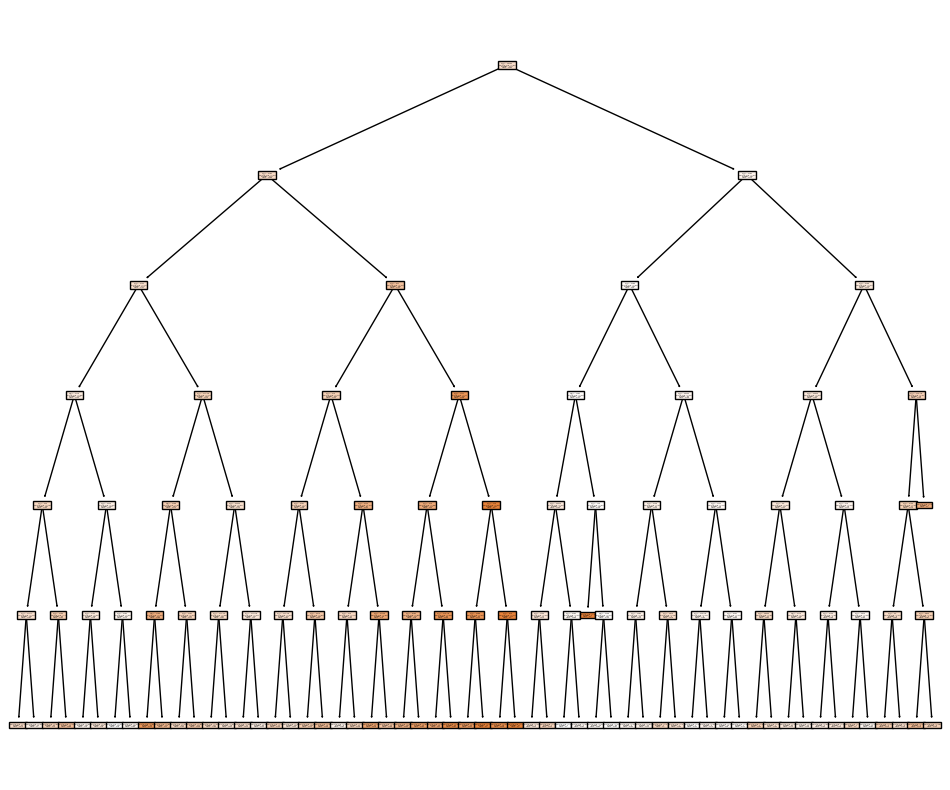

In [32]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled =True)

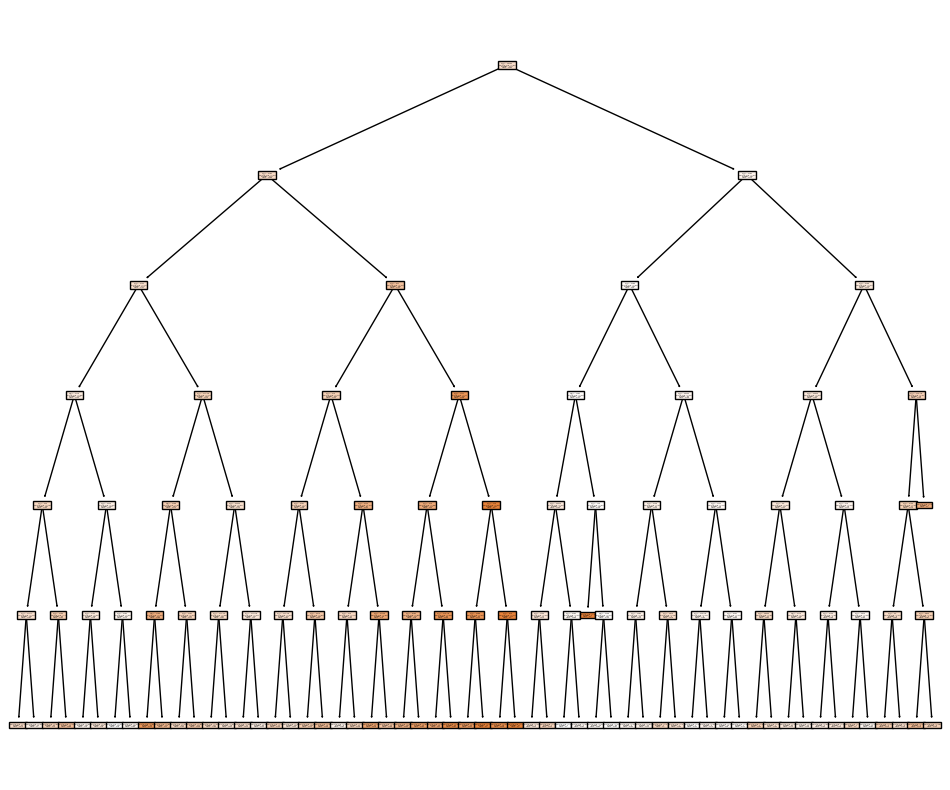

In [33]:

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled =True)
plt.show()

In [34]:
y_pred = regressorcv.predict(x_test)
y_pred

array([1.5926    , 3.49827815, 1.74605373, ..., 2.59386938, 1.89182585,
       0.72477181])

In [35]:
from sklearn.metrics import r2_score

In [36]:
accuracy = r2_score(y_test,y_pred)
accuracy

0.5995952757789793

In [38]:
# saving  model in the form pickle file (5thousand data has been trained)
import pickle
file  = open('/config/workspace/Model/decisiontreeRegressorModel','wb')
pickle.dump(regressor,file)
file.close()